In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os

currentPath = os.getcwd()
os.chdir('/Users/kimfr/OneDrive - unist.ac.kr/2019-fall/OR1/Groupwork/data')

In [2]:
stock =pd.read_excel('kospi_30.xlsx')
bond = pd.read_excel('국채3년.xlsx')

In [3]:
stock

,Date,005930,000660,005935,035420,005380,012330,068270,051910,055550,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,2016-11-03,0.0000,0.0403,0.0268,0.0316,-0.0035,0.0000,-0.0206,-0.0133,0.0303,...,0.0342,0.0047,-0.0179,0.0321,-0.0090,0.0164,-0.0052,-0.0036,0.0243,-0.0168
1,2016-11-04,0.0080,0.0018,0.0752,0.0000,-0.0244,-0.0042,0.0184,-0.0045,-0.0106,...,-0.0041,-0.0047,-0.0043,0.0311,-0.0227,0.0000,-0.0052,0.0000,0.0055,0.0000
2,2016-11-05,-0.0224,-0.0351,0.0010,-0.0051,-0.0179,0.0106,0.0009,-0.0105,-0.0048,...,0.0373,-0.0140,0.0148,0.0067,0.0209,-0.0072,-0.0157,-0.0218,-0.0145,0.0249
3,2016-11-06,-0.0163,0.0237,0.0000,-0.0103,-0.0073,0.0168,-0.0300,0.0000,0.0120,...,-0.0080,0.0000,0.0292,-0.0150,-0.0136,0.0270,-0.0035,0.0372,0.0203,0.0397
4,2016-11-07,0.0090,0.0000,-0.0051,-0.0052,0.0000,0.0083,0.0018,0.0396,0.0083,...,0.0081,0.0000,-0.0075,-0.0085,0.0138,-0.0053,-0.0374,0.0179,0.0090,-0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2019-10-28,0.0079,0.0000,-0.0012,0.0295,-0.0162,0.0000,0.0203,0.0017,0.0023,...,-0.0062,-0.0192,0.0000,0.0058,-0.0191,0.0088,-0.0067,-0.0096,-0.0424,-0.0189
1090,2019-10-29,-0.0039,0.0012,-0.0097,-0.0255,0.0082,0.0021,0.0224,-0.0066,0.0080,...,0.0093,-0.0049,-0.0036,0.0043,0.0000,0.0029,0.0000,0.0354,0.0177,-0.0192
1091,2019-10-30,-0.0137,-0.0181,0.0024,0.0098,0.0000,0.0021,-0.0073,0.0167,-0.0193,...,-0.0215,0.0000,-0.0108,-0.0058,0.0117,-0.0072,-0.0136,0.1429,-0.0189,-0.0049
1092,2019-10-31,0.0000,0.0061,-0.0012,0.0615,-0.0041,0.0000,-0.0196,0.0082,-0.0151,...,0.0063,-0.0148,0.0254,0.0043,-0.0058,-0.0234,-0.0069,0.0435,-0.0030,-0.0177


In [4]:
stock.columns

Index(['Date', '005930', '000660', '005935', '035420', '005380', '012330',
       '068270', '051910', '055550', '017670', '051900', '105560', '028260',
       '005490', '034730', '015760', '000270', '006400', '018260', '032830',
       '096770', '033780', '035720', '003550', '036570', '066570', '000810',
       '090430', '086790', '010950'],
      dtype='object')

In [5]:
index = stock.columns
ret = stock
index = index.drop(labels=['Date'])

 Markowitz portfolio optimization 사용

In [6]:
mu = ret.mean()
sigma = stock.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000

In [7]:
mu

005930    0.000630
000660    0.001221
005935    0.000945
035420   -0.000283
005380   -0.000008
012330    0.000186
068270    0.001113
051910    0.000083
055550    0.000119
017670    0.000027
051900    0.000593
105560    0.000255
028260   -0.000175
005490    0.000408
034730    0.000157
015760   -0.000522
000270   -0.000092
006400    0.000879
018260    0.000008
032830   -0.000182
096770    0.000447
033780    0.000048
035720    0.000388
003550    0.000321
036570    0.001034
066570    0.000369
000810   -0.000144
090430   -0.000428
086790    0.000387
010950    0.000403
dtype: float64

In [8]:
results =  np.zeros((30+3 ,num_portfolios))

In [9]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(30))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mu * weights) * 1192
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(sigma, weights))) * np.sqrt(1192)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+2,i] = weights[j]

In [10]:
results[0,:]

array([0.2835907 , 0.28564713, 0.31785824, ..., 0.29119616, 0.40163807,
       0.26164084])

In [11]:
index

Index(['005930', '000660', '005935', '035420', '005380', '012330', '068270',
       '051910', '055550', '017670', '051900', '105560', '028260', '005490',
       '034730', '015760', '000270', '006400', '018260', '032830', '096770',
       '033780', '035720', '003550', '036570', '066570', '000810', '090430',
       '086790', '010950'],
      dtype='object')

In [12]:
col=['ret','stdev','sharpe']
for i in range(0,30):
    col.append(index[i])

In [13]:
col

['ret',
 'stdev',
 'sharpe',
 '005930',
 '000660',
 '005935',
 '035420',
 '005380',
 '012330',
 '068270',
 '051910',
 '055550',
 '017670',
 '051900',
 '105560',
 '028260',
 '005490',
 '034730',
 '015760',
 '000270',
 '006400',
 '018260',
 '032830',
 '096770',
 '033780',
 '035720',
 '003550',
 '036570',
 '066570',
 '000810',
 '090430',
 '086790',
 '010950']

In [14]:
results_frame = pd.DataFrame(results.T, columns = col)

In [15]:
results_frame

,ret,stdev,sharpe,005930,000660,005935,035420,005380,012330,068270,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,0.283591,0.156944,0.054158,0.006617,0.030782,0.059564,0.025667,0.041780,0.067476,0.006689,...,0.014797,0.011721,0.023235,0.016410,0.047629,0.066603,0.067903,0.067533,0.014885,0.0
1,0.285647,0.137244,0.037195,0.053288,0.014907,0.049140,0.000715,0.059896,0.015979,0.016972,...,0.016909,0.011759,0.053546,0.004351,0.051408,0.038505,0.030328,0.002723,0.035835,0.0
2,0.317858,0.126949,0.046356,0.010078,0.009720,0.031897,0.012831,0.026308,0.023177,0.024186,...,0.041270,0.006734,0.049326,0.055443,0.027406,0.024691,0.015625,0.039481,0.035498,0.0
3,0.335095,0.138902,0.010950,0.028347,0.012458,0.013283,0.047603,0.038563,0.058337,0.048712,...,0.056643,0.008168,0.003552,0.041334,0.016202,0.007723,0.015328,0.021225,0.023161,0.0
4,0.386618,0.131515,0.017504,0.049115,0.056434,0.013830,0.010396,0.057042,0.047200,0.031327,...,0.018344,0.041633,0.032126,0.038415,0.025001,0.017483,0.036150,0.047885,0.032279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.442167,0.148924,0.003965,0.057401,0.048807,0.013862,0.006634,0.029474,0.069710,0.007118,...,0.036949,0.003524,0.048169,0.054012,0.063269,0.018402,0.001244,0.017781,0.024435,0.0
24996,0.393396,0.143054,0.031517,0.047986,0.030476,0.036318,0.032369,0.018199,0.047359,0.048196,...,0.023374,0.056011,0.020044,0.052216,0.047347,0.007618,0.050887,0.034721,0.026984,0.0
24997,0.291196,0.129431,0.046892,0.017530,0.051934,0.042322,0.033753,0.052469,0.018083,0.057453,...,0.032552,0.004707,0.010707,0.043859,0.028684,0.026078,0.054803,0.015179,0.038452,0.0
24998,0.401638,0.150673,0.035953,0.059931,0.059123,0.064772,0.021784,0.028689,0.051938,0.013748,...,0.006215,0.045850,0.014774,0.045837,0.013413,0.031935,0.019006,0.043865,0.022606,0.0


In [16]:
results_frame.to_excel("portfolio_generation_30.xlsx")

In [17]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [18]:
min_vol_port

ret       0.312966
stdev     0.119798
sharpe    0.033355
005930    0.042261
000660    0.006998
005935    0.010252
035420    0.012789
005380    0.040257
012330    0.016682
068270    0.062067
051910    0.023002
055550    0.040380
017670    0.050196
051900    0.052576
105560    0.034705
028260    0.033201
005490    0.028050
034730    0.050558
015760    0.027982
000270    0.042720
006400    0.021200
018260    0.048396
032830    0.040447
096770    0.054420
033780    0.025629
035720    0.057001
003550    0.032917
036570    0.004533
066570    0.049571
000810    0.005220
090430    0.008484
086790    0.044149
010950    0.000000
Name: 15385, dtype: float64

Text(0, 0.5, 'Returns')

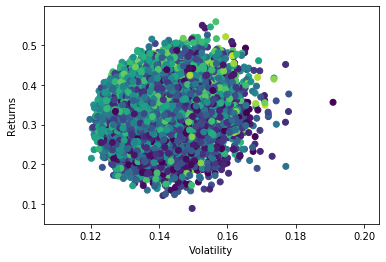

In [19]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [20]:
print("optimal portfolio in market has return" , min_vol_port[0] , "volatility" , min_vol_port[1])

optimal portfolio in market has return 0.3129656862359924 volatility 0.1197980680758744


In [21]:
best = results_frame[results_frame['ret']== min_vol_port[0]].index.tolist()
best[0]

15385

In [22]:
del stock['Date']
stock

,005930,000660,005935,035420,005380,012330,068270,051910,055550,017670,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,0.0000,0.0403,0.0268,0.0316,-0.0035,0.0000,-0.0206,-0.0133,0.0303,-0.0060,...,0.0342,0.0047,-0.0179,0.0321,-0.0090,0.0164,-0.0052,-0.0036,0.0243,-0.0168
1,0.0080,0.0018,0.0752,0.0000,-0.0244,-0.0042,0.0184,-0.0045,-0.0106,0.0000,...,-0.0041,-0.0047,-0.0043,0.0311,-0.0227,0.0000,-0.0052,0.0000,0.0055,0.0000
2,-0.0224,-0.0351,0.0010,-0.0051,-0.0179,0.0106,0.0009,-0.0105,-0.0048,0.0160,...,0.0373,-0.0140,0.0148,0.0067,0.0209,-0.0072,-0.0157,-0.0218,-0.0145,0.0249
3,-0.0163,0.0237,0.0000,-0.0103,-0.0073,0.0168,-0.0300,0.0000,0.0120,-0.0079,...,-0.0080,0.0000,0.0292,-0.0150,-0.0136,0.0270,-0.0035,0.0372,0.0203,0.0397
4,0.0090,0.0000,-0.0051,-0.0052,0.0000,0.0083,0.0018,0.0396,0.0083,-0.0119,...,0.0081,0.0000,-0.0075,-0.0085,0.0138,-0.0053,-0.0374,0.0179,0.0090,-0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.0079,0.0000,-0.0012,0.0295,-0.0162,0.0000,0.0203,0.0017,0.0023,0.0064,...,-0.0062,-0.0192,0.0000,0.0058,-0.0191,0.0088,-0.0067,-0.0096,-0.0424,-0.0189
1090,-0.0039,0.0012,-0.0097,-0.0255,0.0082,0.0021,0.0224,-0.0066,0.0080,-0.0084,...,0.0093,-0.0049,-0.0036,0.0043,0.0000,0.0029,0.0000,0.0354,0.0177,-0.0192
1091,-0.0137,-0.0181,0.0024,0.0098,0.0000,0.0021,-0.0073,0.0167,-0.0193,-0.0043,...,-0.0215,0.0000,-0.0108,-0.0058,0.0117,-0.0072,-0.0136,0.1429,-0.0189,-0.0049
1092,0.0000,0.0061,-0.0012,0.0615,-0.0041,0.0000,-0.0196,0.0082,-0.0151,0.0128,...,0.0063,-0.0148,0.0254,0.0043,-0.0058,-0.0234,-0.0069,0.0435,-0.0030,-0.0177


In [23]:
port = np.zeros(30)
for i in range(0,30):
    port[i]=min_vol_port.iloc[i+3]
port

array([0.04226146, 0.00699764, 0.01025232, 0.01278877, 0.04025737,
       0.01668186, 0.06206743, 0.02300185, 0.04038039, 0.05019602,
       0.05257647, 0.03470546, 0.03320123, 0.02804984, 0.05055816,
       0.02798222, 0.04272001, 0.02119953, 0.04839606, 0.0404471 ,
       0.05442031, 0.02562903, 0.05700147, 0.03291741, 0.00453255,
       0.04957078, 0.00522005, 0.00848351, 0.04414911, 0.        ])

In [24]:
equity_fund = np.dot(stock,port)
print(equity_fund)

[ 0.00432485  0.00231262 -0.00442409 ... -0.00354401  0.00071997
  0.00824053]


In [25]:
equity = pd.DataFrame(equity_fund, columns = ['equity_fund'])
equity

,equity_fund
0,0.004325
1,0.002313
2,-0.004424
3,0.005016
4,-0.001869
...,...
1089,0.000887
1090,0.003717
1091,-0.003544
1092,0.000720


In [26]:
bond

,date,yield
0,2014/12/31,0.02095
1,2015/01/02,0.02135
2,2015/01/05,0.02115
3,2015/01/06,0.02080
4,2015/01/07,0.02077
...,...,...
1089,2019/06/04,0.01570
1090,2019/06/05,0.01540
1091,2019/06/07,0.01530
1092,2019/06/10,0.01530


In [27]:
equity

,equity_fund
0,0.004325
1,0.002313
2,-0.004424
3,0.005016
4,-0.001869
...,...
1089,0.000887
1090,0.003717
1091,-0.003544
1092,0.000720


In [28]:
df_logret = pd.DataFrame({'stock':equity['equity_fund'], 'bond':bond['yield'] })
df_logret

,stock,bond
0,0.004325,0.02095
1,0.002313,0.02135
2,-0.004424,0.02115
3,0.005016,0.02080
4,-0.001869,0.02077
...,...,...
1089,0.000887,0.01570
1090,0.003717,0.01540
1091,-0.003544,0.01530
1092,0.000720,0.01530


In [29]:
df_logret.iloc[:,1]=df_logret.iloc[:,1]/252
mu = df_logret.mean()*252
print(mu)

stock    0.065963
bond     0.017789
dtype: float64


In [30]:
sigma = df_logret.cov()*252
sigma = sigma.values
print("mean of portfolio is", mu)
print("cov of portfolio is", sigma)

mean of portfolio is stock    0.065963
bond     0.017789
dtype: float64
cov of portfolio is [[ 4.00146076e-03 -1.23042487e-06]
 [-1.23042487e-06  2.81225309e-08]]


In [31]:
num_samples = 5000
bond, stock = np.random.multivariate_normal(mu, sigma, num_samples).T

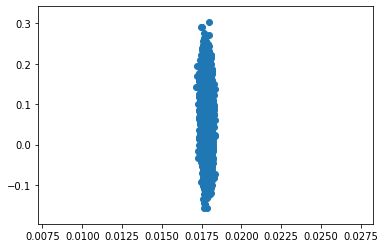

In [32]:
plt.scatter(stock, bond)

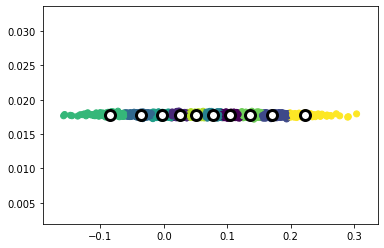

In [33]:
from sklearn.cluster import KMeans

num_clusters =10
kmeans = KMeans(n_clusters = num_clusters).fit(np.transpose([bond,stock]))

plt.scatter(bond, stock, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,
           color='white', edgecolor = 'black', linewidth=3)

In [34]:
print("Scenario probabilities\n")
p=np.zeros(num_clusters)
for i in range(num_clusters):
    p[i] = np.count_nonzero(kmeans.labels_== i)/num_samples
    print("cluster " +str(i)+": {:6.2%}".format(p[i],1))

Scenario probabilities

cluster 0: 14.56%
cluster 1: 13.56%
cluster 2:  6.30%
cluster 3:  6.54%
cluster 4: 17.22%
cluster 5: 11.10%
cluster 6:  2.38%
cluster 7: 10.72%
cluster 8: 15.76%
cluster 9:  1.86%


In [35]:
scenarios = 1 + kmeans.cluster_centers_
scenarios

array([[1.10499182, 1.01777392],
       [1.02509456, 1.0178018 ],
       [1.17112548, 1.01774824],
       [0.96322241, 1.01780582],
       [1.07747685, 1.01777789],
       [0.99781923, 1.01780425],
       [0.91539042, 1.01781937],
       [1.13583623, 1.01775975],
       [1.05116714, 1.01779654],
       [1.22246925, 1.01774896]])

In [82]:
import cvxpy as cp

x_0 = cp.Variable(2)
y = cp.Variable(num_clusters)
w = cp.Variable(num_clusters)
q=1 ;r=10
initial_amount = 100
goal_amount = 104

In [83]:
goal= cp.Maximize(p.T * (q*y - r*w))
prob= cp.Problem(goal,[sum(x_0) == initial_amount, scenarios * x_0 - y + w 
                      ==goal_amount * np.ones(num_clusters),x_0>=0, y>=0, w>=0])

In [84]:
prob.solve(solver = cp.ECOS)

-10.127266569019401

In [85]:
print("optiman asset allocation is stock: " ,x_0.value[0], "   bond :" ,x_0.value[1])

optiman asset allocation is stock:  66.53600292327148    bond : 33.46399707672855


In [50]:
print("optimal allocation: " +  "{:2.2f}".format(x_0.value[0]) + ", " 
     + "{:2.2f}".format(x_0.value[1]))
print("expected return: "+"{:.2%}".format((goal_amount + np.dot(p, y.value-w.value))/initial_amount-1,1))

optimal allocation: 100.00, 0.00
expected return: 6.49%


Text(0, 0.5, 'final wealth')

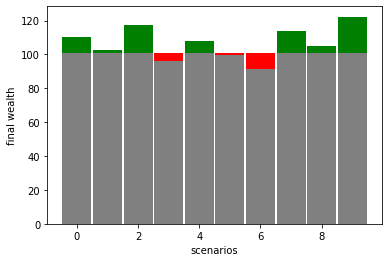

In [51]:
fig, ax = plt.subplots(1,1)
ax.bar(range(num_clusters), np.round(goal_amount+y.value,2),color='green',width=0.95)
ax.bar(range(num_clusters), goal_amount, color='red', width =0.95)
ax.bar(range(num_clusters), np.round(goal_amount-w.value,2),color ='grey',width =0.95)
ax.set_xlabel('scenarios')
ax.set_ylabel('final wealth')